# Results for itemsets and patched sample for each medoid

In [258]:
import os
import pickle
import numpy as np
import pandas as pd

In [34]:
data_path = 'tests/logs/exp_data_20230509182512'
explanations = pickle.load(open(os.path.join(data_path, 'itemsets_synth_multidim_010_000.joblib'), 'rb'))
medoids = pickle.load(open(os.path.join(data_path, 'medoids_synth_multidim_010_000.joblib'), 'rb'))
patches = pickle.load(open(os.path.join(data_path, 'patches_synth_multidim_010_000.joblib'), 'rb'))

In [3]:
print(len(explanations))
print(len(medoids))

19
19


# Alpha values

## Loss

In [288]:
from itertools import chain

alpha = 3

data = {1: ['tests/logs/paper_exp/alpha1_0.8', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/alpha1_1.2'],
        #2: ['tests/logs/alpha2_0.4', 'tests/logs/alpha2_0.5', 'tests/logs/alpha2_0.6', 'tests/logs/alpha2_0.7', 'tests/logs/alpha2_0.8'],
        2: ['tests/logs/paper_exp/alpha2_0.8', 'tests/logs/paper_exp/alpha2_1.0', 'tests/logs/paper_exp/alpha2_1.2'],
        #3: ['tests/logs/alpha3_0.2', 'tests/logs/alpha3_0.3', 'tests/logs/alpha3_0.4', 'tests/logs/alpha3_0.5', 'tests/logs/alpha3_0.6']}
        3:['tests/logs/paper_exp/alpha3_0.1', 'tests/logs/paper_exp/alpha3_0.3', 'tests/logs/paper_exp/alpha3_0.5']}
dataset_path = 'datasets/synthetic/processed/'

files = os.listdir(dataset_path)
files.sort()

data_paths = data[alpha]
#data_paths = ['tests/logs/alpha1_1.01']

precisions = []
jaccards = []

for data_path in data_paths:
    for f in files:
        if not (f.startswith('info_') or ('100' in f)):

            info_df = pd.read_csv(dataset_path+f.replace('synth_', 'info_synth_'))
            subspaces = pickle.load(open(dataset_path+f.replace('synth_', 'info_synth_').replace('.csv', '.joblib'), 'rb'))

            prec_f = []
            jacc_f = []

            explanations = pickle.load(open(os.path.join(data_path, f"itemsets_{f.replace('.csv', '.joblib')}"), 'rb'))
            
            for i in range(len(explanations)):
                features = np.array(subspaces)[list(info_df.iloc[i, :info_df.shape[1]-1])]
                d_found = []
                for e in explanations[i]:
                    d_found.extend(e)
                d_found = set(d_found)
                d_real = set(list(chain.from_iterable(features)))
                if len(d_found) > 0:
                    prec = len(d_real.intersection(d_found)) / len(d_found)
                else:
                    prec = 0
                jacc = len(d_real.intersection(d_found)) / len(d_real.union(d_found))
                jacc_f.append(jacc)
                prec_f.append(prec)

            precisions.append(np.array(prec_f).mean())
            jaccards.append(np.array(jacc_f).mean())
            
precisions = np.array(precisions).reshape((len(data_paths), -1, 3))
jaccards = np.array(jaccards).reshape((len(data_paths), -1, 3))
precisions_m = precisions.mean(axis=-1)
jaccards_m = jaccards.mean(axis=-1)

In [289]:
print(precisions_m)
print(jaccards_m)

[[0.90945419 0.61288417 0.47344258 0.32189951 0.24983595 0.16541026]
 [1.         0.8925977  0.7297138  0.50035621 0.37546947 0.27443807]
 [1.         0.87675424 0.74130191 0.54944021 0.38441372 0.31878242]]
[[0.86407407 0.59640186 0.44335737 0.28944748 0.22019556 0.14823754]
 [0.82721248 0.72150676 0.53866943 0.33750939 0.25100077 0.18878853]
 [0.69214425 0.61045508 0.45440416 0.31992777 0.23207434 0.20592341]]


In [291]:
id = 2
for i in range(len(precisions_m[0])):
    print(precisions_m[id][i]/precisions_m[1][i], end=' &')

1.0 &0.9822501680181703 &1.0158803399084861 &1.0980981220117192 &1.023821509182729 &1.1615823330459583 &

In [293]:
id = 2
for i in range(len(jaccards_m[0])):
    print(jaccards_m[id][i]/jaccards_m[1][i], end=' &')

0.8367188236403053 &0.8460836534866457 &0.8435677491726334 &0.9479077628667175 &0.9245961315231245 &1.090762314381633 &

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


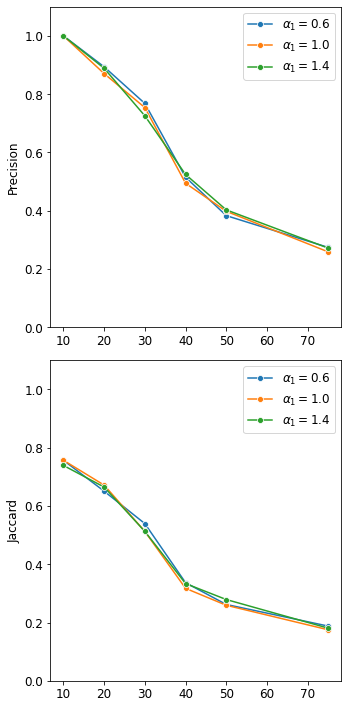

In [267]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.figure(figsize=(5,10))

#sns.set_palette("colorblind")
#sns.set_style("darkgrid")

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

plt.subplot(2,1,1)
for i in range(len(data_paths)):
    sns.lineplot(x=[10,20,30,40,50,75], y=precisions_m[i], marker="o", label="$\\alpha_{}={}$".format(alpha, data_paths[i][-3:])) #'-s', label='alpha={:.1f}'.format(0.1*(i+1)))
plt.legend()
plt.ylim(0.0,1.1)
plt.tight_layout()
plt.ylabel('Precision')
plt.subplot(2,1,2)
for i in range(len(data_paths)):
    sns.lineplot(x=[10,20,30,40,50,75], y=jaccards_m[i], marker="o", label="$\\alpha_{}={}$".format(alpha, data_paths[i][-3:]))
plt.legend()
plt.ylim(0.0,1.1)
plt.tight_layout()
plt.ylabel('Jaccard')
plt.savefig(f'parameter_alpha{alpha}.eps'.format(alpha))

## Parameters

In [71]:
from itertools import chain


dataset_path = 'datasets/synthetic/processed/'

files = os.listdir(dataset_path)
files.sort()

par = 'no'

par_string = {
                'ee': 'e_e',
                'no': 'k',
                'eb': 'e_b',
                'lr': '\\eta'
                }

data = {'ee': ['tests/logs/epochs_test_20', 'tests/logs/epochs_test_40'],
        'no': ['tests/logs/no_test_60', 'tests/logs/no_test_140'],
        'eb': ['tests/logs/batch_test_8', 'tests/logs/batch_test_32'],
        'lr': ['tests/logs/lr_test_0.0005', 'tests/logs/lr_test_0.002']
       }
#data_paths = ['tests/logs/alpha1_1.01']

precisions = []
jaccards = []

for data_path in data_paths:
    for f in files:
        if not (f.startswith('info_') or ('100' in f)):

            info_df = pd.read_csv(dataset_path+f.replace('synth_', 'info_synth_'))
            subspaces = pickle.load(open(dataset_path+f.replace('synth_', 'info_synth_').replace('.csv', '.joblib'), 'rb'))

            prec_f = []
            jacc_f = []

            explanations = pickle.load(open(os.path.join(data_path, f"itemsets_{f.replace('.csv', '.joblib')}"), 'rb'))
            
            for i in range(len(explanations)):
                features = np.array(subspaces)[list(info_df.iloc[i, :info_df.shape[1]-1])]
                d_found = []
                for e in explanations[i]:
                    d_found.extend(e)
                d_found = set(d_found)
                d_real = set(list(chain.from_iterable(features)))
                if len(d_found) > 0:
                    prec = len(d_real.intersection(d_found)) / len(d_found)
                else:
                    prec = 0
                jacc = len(d_real.intersection(d_found)) / len(d_real.union(d_found))
                jacc_f.append(jacc)
                prec_f.append(prec)

            precisions.append(np.array(prec_f).mean())
            jaccards.append(np.array(jacc_f).mean())
            
precisions = np.array(precisions).reshape((len(data_paths), -1, 3))
jaccards = np.array(jaccards).reshape((len(data_paths), -1, 3))
precisions_m = precisions.mean(axis=-1)
jaccards_m = jaccards.mean(axis=-1)

In [72]:
print(precisions_m)
print(jaccards_m)

[[0.96616541 0.84746798 0.70331089 0.48422759 0.40657985 0.27945673]
 [1.         0.85560482 0.71798541 0.48566534 0.37998122 0.27037492]
 [1.         0.83853859 0.68532548 0.45346739 0.35640669 0.25562745]]
[[0.93096074 0.758422   0.56352213 0.34862609 0.29036267 0.18851729]
 [0.8139961  0.70671397 0.55509159 0.33408405 0.26420263 0.19494528]
 [0.77434698 0.7017225  0.49838364 0.31200755 0.25297224 0.18159412]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


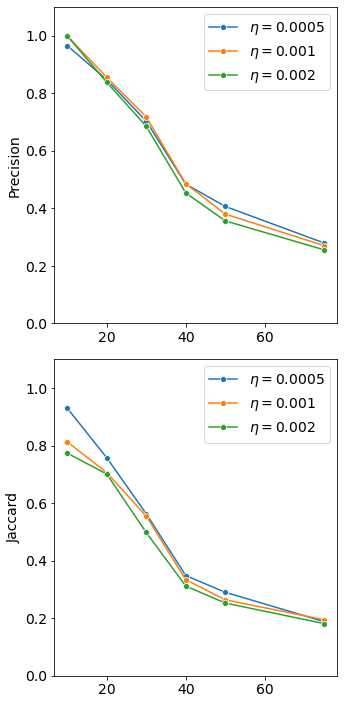

In [43]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.figure(figsize=(5,10))

#sns.set_palette("colorblind")
#sns.set_style("darkgrid")

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
plt.rc('legend', fontsize=14) 

plt.subplot(2,1,1)
for i in range(len(data_paths)):
    sns.lineplot(x=[10,20,30,40,50,75], y=precisions_m[i], marker="o", label="${}={}$".format(par_string[par], values[par][i])) #'-s', label='alpha={:.1f}'.format(0.1*(i+1)))
plt.legend()
plt.ylim(0.0,1.1)
plt.tight_layout()
plt.ylabel('Precision')
plt.subplot(2,1,2)
for i in range(len(data_paths)):
    sns.lineplot(x=[10,20,30,40,50,75], y=jaccards_m[i], marker="o", label="${}={}$".format(par_string[par], values[par][i]))
plt.legend()
plt.ylim(0.0,1.1)
plt.tight_layout()
plt.ylabel('Jaccard')
plt.savefig(f'parameter_{par}.eps')

In [40]:
plt.close()

In [41]:
data_paths

['tests/logs/lr_test_0.0005',
 'tests/logs/alpha1_1.0',
 'tests/logs/lr_test_0.002']

In [138]:
print(np.array(prec_f).mean())
print(np.array(jacc_f).mean())

0.2510510510510511
0.16895109395109392


# Comparison with competitors

In [61]:
# ATON results 
values = [[0.6083, 1.0000, 0.6083],
[0.8750, 0.8100, 0.7552],
[0.9033, 0.7160, 0.6787],
[0.4133, 0.6867, 0.3811],
[0.5800, 0.5800, 0.4291],
[0.6030, 0.9533, 0.5923],
[0.4410, 0.6562, 0.3737],
[0.3270, 0.6889, 0.3006],
[0.2476, 0.7500, 0.2454],
[0.2112, 0.5000, 0.1834],
[0.3186, 0.5700, 0.2727],
[0.1840, 0.6400, 0.1771],
[0.1293, 0.1960, 0.1033],
[0.2164, 0.4050, 0.1694],
[0.2917, 0.4560, 0.2263],
[0.1741, 0.8000, 0.1705],
[0.0867, 0.3900, 0.0806],
[0.2019, 0.8750, 0.1989],
[0.0557, 0.1200, 0.0413],
[0.0890, 0.1920, 0.0688],
[0.1438, 0.7400, 0.1413]]

values = np.array(values)
values = values.reshape((-1,3,3))
values_m = values.mean(axis=1)

In [62]:
# COIN results
values_c = [[1.0000, 1.0000, 1.0000],
[0.8081, 1.0000, 0.8081],
[0.7411, 1.0000, 0.7411],
[0.2951, 1.0000, 0.2951],
[0.3467, 0.9900, 0.3460],
[0.5310, 1.0000, 0.5310],
[0.2380, 0.9187, 0.2348],
[0.2130, 1.0000, 0.2130],
[0.3067, 0.9900, 0.3067],
[0.1309, 0.8083, 0.1292],
[0.1481, 0.7550, 0.1433],
[0.1145, 0.8000, 0.1145],
[0.0949, 0.3880, 0.0885],
[0.1034, 0.4950, 0.0942],
[0.1467, 0.6520, 0.1362],
[0.1050, 0.9800, 0.1050],
[0.0755, 0.7300, 0.0751],
[0.1450, 1.0000, 0.1450],
[0.0505, 0.2700, 0.0462],
[0.0645, 0.3120, 0.0578],
[0.1163, 0.9700, 0.1162]]

values_c = np.array(values_c)
values_c = values_c.reshape((-1,3,3))
values_c_m = values_c.mean(axis=1)

In [68]:
from itertools import chain


dataset_path = 'datasets/synthetic/processed/'

files = os.listdir(dataset_path)
files.sort()


precisions = []
jaccards = []

#data_path = 'tests/logs/alpha3_0.3'
data_path = 'tests/logs/no_test_60'
for f in files:
    if not (f.startswith('info_') or ('100' in f)):
        info_df = pd.read_csv(dataset_path+f.replace('synth_', 'info_synth_'))
        subspaces = pickle.load(open(dataset_path+f.replace('synth_', 'info_synth_').replace('.csv', '.joblib'), 'rb'))
        prec_f = []
        jacc_f = []
        explanations = pickle.load(open(os.path.join(data_path, f"itemsets_{f.replace('.csv', '.joblib')}"), 'rb'))
        
        for i in range(len(explanations)):
            features = np.array(subspaces)[list(info_df.iloc[i, :info_df.shape[1]-1])]
            d_found = []
            for e in explanations[i]:
                d_found.extend(e)
            d_found = set(d_found)
            d_real = set(list(chain.from_iterable(features)))
            if len(d_found) > 0:
                prec = len(d_real.intersection(d_found)) / len(d_found)
            else:
                prec = 0
            jacc = len(d_real.intersection(d_found)) / len(d_real.union(d_found))
            jacc_f.append(jacc)
            prec_f.append(prec)
        precisions.append(np.array(prec_f).mean())
        jaccards.append(np.array(jacc_f).mean())
            
precisions = np.array(precisions).reshape((-1, 3))
jaccards = np.array(jaccards).reshape((-1, 3))
precisions_m = precisions.mean(axis=-1)
jaccards_m = jaccards.mean(axis=-1)

In [77]:
precisions_m = precisions_m[0]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


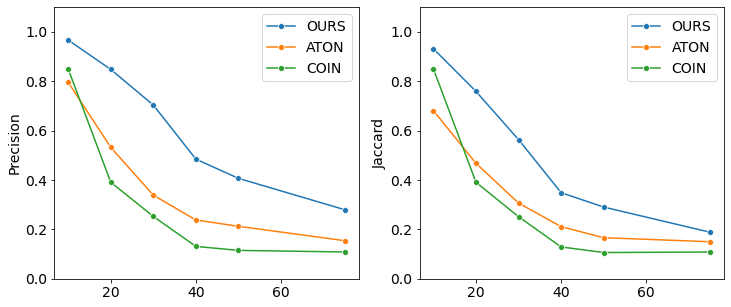

In [78]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
sns.lineplot(x=[10,20,30,40,50,75], y=precisions_m, marker="o", label=f'OURS')
sns.lineplot(x=[10,20,30,40,50,75], y=values_m[:len(values_m)-1,0], marker="o", label=f'ATON')
sns.lineplot(x=[10,20,30,40,50,75], y=values_c_m[:len(values_m)-1,0], marker="o", label=f'COIN')
plt.ylim(0.0,1.1)
plt.legend()
plt.ylabel('Precision')
plt.subplot(1,2,2)
sns.lineplot(x=[10,20,30,40,50,75], y=jaccards_m, marker="o", label=f'OURS')
sns.lineplot(x=[10,20,30,40,50,75], y=values_m[:len(values_m)-1,2], marker="o", label=f'ATON')
sns.lineplot(x=[10,20,30,40,50,75], y=values_c_m[:len(values_m)-1,2], marker="o", label=f'COIN')
plt.ylim(0.0,1.1)
plt.legend()
plt.ylabel('Jaccard')
plt.savefig('ATOM_SOD_HICS.eps')

# Mask quality

## alpha values

In [283]:
from sklearn.ensemble import IsolationForest as IForest

alpha = 1

data = {1: ['tests/logs/paper_exp/alpha1_0.8', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/alpha1_1.2'],
        #2: ['tests/logs/alpha2_0.4', 'tests/logs/alpha2_0.5', 'tests/logs/alpha2_0.6', 'tests/logs/alpha2_0.7', 'tests/logs/alpha2_0.8'],
        2: ['tests/logs/paper_exp/alpha2_0.8', 'tests/logs/paper_exp/alpha2_1.0', 'tests/logs/paper_exp/alpha2_1.2'],
        3:['tests/logs/paper_exp/alpha3_0.1', 'tests/logs/paper_exp/alpha3_0.3', 'tests/logs/paper_exp/alpha3_0.5']}
dataset_path = 'datasets/synthetic/processed/'

files = os.listdir(dataset_path)
files.sort()

data_paths = data[alpha]
#data_paths = ['tests/logs/alpha1_1.01']

mask_scores = []

for data_path in data_paths:
    for f in files:
        if not (f.startswith('info_') or ('100' in f)):
            print(f)

            data = pd.read_csv(dataset_path + f)
            x_train = data.iloc[:, :data.shape[1] - 1].to_numpy()
            y_train = data['class'].to_numpy()

            explanations = pickle.load(open(os.path.join(data_path, f"itemsets_{f.replace('.csv', '.joblib')}"), 'rb'))
            patches = pickle.load(open(os.path.join(data_path, f"patches_{f.replace('.csv', '.joblib')}"), 'rb'))
            
            info_df = pd.read_csv(dataset_path+f.replace('synth_', 'info_synth_'))
            subspaces = pickle.load(open(dataset_path+f.replace('synth_', 'info_synth_').replace('.csv', '.joblib'), 'rb'))

            if_s = IForest()
            if_s.fit(x_train)

            scores = []
            i = 0

            for o in np.argwhere(y_train!=0):
                features = np.array(subspaces)[list(info_df.iloc[i, :info_df.shape[1]-1])]
                d_real = features[0].astype('int')

                sample_to_explain = x_train[o]

                point_scores = []

                if len(explanations[i]) == 0:
                    pos_l_b = pos_l_a = pos_g_b = pos_g_a = pos_r_b = pos_r_a = np.NaN
                else:
                    it_scores = []
                    
                    if_s_r = IForest()
                    if_s_r.fit(x_train[:, d_real])
                    for j in range(len(explanations[i])):
                        e = list(explanations[i][j])
                        npt = patches[i][j]

                        if_s_s = IForest()
                        if_s_s.fit(x_train[:, e])
                        
                        ptc_scores = []
                        for p in npt:
                            pos_g_a = - if_s.score_samples(p.reshape(1, -1))[0]
                            pos_g_b = - if_s.score_samples(sample_to_explain)[0]

                            pos_l_a = - if_s_s.score_samples(p.reshape(1, -1)[:, e])[0]
                            pos_l_b = - if_s_s.score_samples(sample_to_explain[:, e])[0]
                            
                            pos_r_a = - if_s_r.score_samples(p.reshape(1, -1)[:, d_real])[0]
                            pos_r_b = - if_s_r.score_samples(sample_to_explain[:, d_real])[0]
                            
                            ptc_scores.append([pos_g_b, pos_g_a, pos_l_b, pos_l_a, pos_r_b, pos_r_a])
                        it_scores.append(ptc_scores)
                scores.append(it_scores)
                i += 1
            pickle.dump(scores, open(os.path.join(data_path, f'mask_scores_{f.replace(".csv", ".joblib")}'), 'wb'))
            mask_scores.append(scores)

synth_multidim_010_000.csv
synth_multidim_010_001.csv
synth_multidim_010_002.csv
synth_multidim_020_000.csv
synth_multidim_020_001.csv
synth_multidim_020_002.csv
synth_multidim_030_000.csv
synth_multidim_030_001.csv
synth_multidim_030_002.csv
synth_multidim_040_000.csv
synth_multidim_040_001.csv
synth_multidim_040_002.csv
synth_multidim_050_000.csv
synth_multidim_050_001.csv
synth_multidim_050_002.csv
synth_multidim_075_000.csv
synth_multidim_075_001.csv
synth_multidim_075_002.csv
synth_multidim_010_000.csv
synth_multidim_010_001.csv
synth_multidim_010_002.csv
synth_multidim_020_000.csv
synth_multidim_020_001.csv
synth_multidim_020_002.csv
synth_multidim_030_000.csv
synth_multidim_030_001.csv
synth_multidim_030_002.csv
synth_multidim_040_000.csv
synth_multidim_040_001.csv
synth_multidim_040_002.csv
synth_multidim_050_000.csv
synth_multidim_050_001.csv
synth_multidim_050_002.csv
synth_multidim_075_000.csv
synth_multidim_075_001.csv
synth_multidim_075_002.csv
synth_multidim_010_000.csv
s

In [287]:
len(mask_scores[0])

19

In [143]:
alpha = 3

data = {1: ['tests/logs/paper_exp/alpha1_0.8', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/alpha1_1.2'],
        2: ['tests/logs/paper_exp/alpha2_0.8', 'tests/logs/paper_exp/alpha2_1.0', 'tests/logs/paper_exp/alpha2_1.2'],
        3: ['tests/logs/paper_exp/alpha3_0.1', 'tests/logs/paper_exp/alpha3_0.3', 'tests/logs/paper_exp/alpha3_0.5']}
dataset_path = 'datasets/synthetic/processed/'

files = os.listdir(dataset_path)
files.sort()

data_paths = data[alpha]
scores = []
    
for data_path in data_paths:
    for f in files:
        if not (f.startswith('info_') or ('100' in f)):
            print('------------------FILE--------------------')
            print(f)
            scores_l = pickle.load(open(os.path.join(data_path, f'mask_scores_{f.replace(".csv", ".joblib")}'), 'rb'))
            #print(len(scores_l[0][0][0]))
            m_scores = np.empty(shape=(0,6))
            for o in scores_l:
                for m in o:
                    if len(m)>1:
                        m = np.array(m).squeeze().min(0)
                        m_scores = np.append(m_scores, m.reshape(1,-1), axis=0)
                    else:
                        m = np.array(m).squeeze()
                        m_scores = np.append(m_scores, m.reshape(1,-1), axis=0)
                        #print(m.shape)
            print(m_scores.shape)
            print('-------------------------------------------')
            scores.append(np.array(m_scores).squeeze().mean(0))
                

------------------FILE--------------------
synth_multidim_010_000.csv
(19, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_010_001.csv
(19, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_010_002.csv
(15, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_020_000.csv
(25, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_020_001.csv
(29, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_020_002.csv
(36, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_030_000.csv
(44, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_030_001.csv
(36, 6)
-------------------------------------------
------------------FILE--

In [144]:
scores_r = np.array(scores).reshape((len(data_paths), -1, 3, 6))

In [145]:
# val_par, dims, ds, scores
scores_r.shape

(3, 6, 3, 6)

In [115]:
scores_r[:, :, :, 5]

array([[[0.60900669, 0.60238969, 0.56615755],
        [0.56258473, 0.56832854, 0.58067814],
        [0.5748797 , 0.56622718, 0.57510329],
        [0.58418076, 0.56811036, 0.59070276],
        [0.58212021, 0.58312774, 0.58859421],
        [0.58608723, 0.5903095 , 0.60264643]],

       [[0.55244955, 0.56108012, 0.56650113],
        [0.55727384, 0.54585435, 0.56042909],
        [0.56815096, 0.56903509, 0.56867979],
        [0.57222473, 0.5599433 , 0.57936883],
        [0.57362141, 0.57369069, 0.57609375],
        [0.58185597, 0.58259686, 0.58766709]],

       [[0.53343756, 0.55172093, 0.55254595],
        [0.53362119, 0.53827296, 0.53788109],
        [0.5449339 , 0.55840781, 0.55379961],
        [0.56048295, 0.55645042, 0.5719742 ],
        [0.57035962, 0.56469136, 0.56939757],
        [0.58149809, 0.57743314, 0.58667212]]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


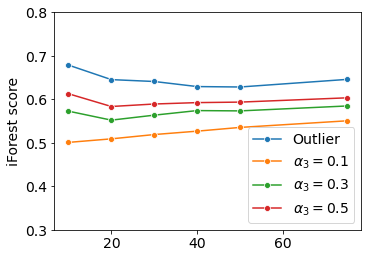

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))

#sns.set_palette("colorblind")
#sns.set_style("darkgrid")

#plt.subplot(2,1,1)
sns.lineplot(x=[10,20,30,40,50,75], y=scores_r.mean(axis=-2)[0, :, 4], marker="o", label="Outlier")
for i in range(len(data_paths)):
    #'-s', label='alpha={:.1f}'.format(0.1*(i+1)))
    sns.lineplot(x=[10,20,30,40,50,75], y=scores_r.mean(axis=-2)[i, :, 5], marker="o", label="$\\alpha_{}={}$".format(alpha, data_paths[i][-3:]))
plt.legend()
plt.ylim(0.3,0.8)
#plt.xticks([10,20,30,40,50,75])
plt.ylabel('iForest score')
plt.savefig(f'alpha_{alpha}_masking_if.eps')

In [237]:
data_path = 'tests/logs/alpha1_1.4'
f = 'synth_multidim_010_000.csv'
chooses = pickle.load(open(os.path.join(data_path, f.replace('.csv', '_choose.joblib')),'rb'))
chooses

[array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],


## parameters values

In [21]:
from sklearn.ensemble import IsolationForest as IForest

par = 'ee'

data = {'ee': ['tests/logs/epochs_test_20', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/epochs_test_40'],
        'no': ['tests/logs/no_test_60', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/no_test_140'],
        'eb': ['tests/logs/batch_test_8', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/batch_test_32'],
        'lr': ['tests/logs/lr_test_0.0005', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/lr_test_0.002']
       }


dataset_path = 'datasets/synthetic/processed/'

files = os.listdir(dataset_path)
files.sort()

data_paths = data[par]
#data_paths = ['tests/logs/alpha1_1.01']

mask_scores = []

for data_path in data_paths:
    for f in files:
        if not (f.startswith('info_') or ('100' in f)):
            print(f)

            data = pd.read_csv(dataset_path + f)
            x_train = data.iloc[:, :data.shape[1] - 1].to_numpy()
            y_train = data['class'].to_numpy()

            explanations = pickle.load(open(os.path.join(data_path, f"itemsets_{f.replace('.csv', '.joblib')}"), 'rb'))
            patches = pickle.load(open(os.path.join(data_path, f"patches_{f.replace('.csv', '.joblib')}"), 'rb'))
            
            info_df = pd.read_csv(dataset_path+f.replace('synth_', 'info_synth_'))
            subspaces = pickle.load(open(dataset_path+f.replace('synth_', 'info_synth_').replace('.csv', '.joblib'), 'rb'))

            if_s = IForest()
            if_s.fit(x_train)

            scores = []
            i = 0

            for o in np.argwhere(y_train!=0):
                features = np.array(subspaces)[list(info_df.iloc[i, :info_df.shape[1]-1])]
                d_real = features[0].astype('int')

                sample_to_explain = x_train[o]

                point_scores = []

                if len(explanations[i]) == 0:
                    pos_l_b = pos_l_a = pos_g_b = pos_g_a = pos_r_b = pos_r_a = np.NaN
                else:
                    it_scores = []
                    
                    if_s_r = IForest()
                    if_s_r.fit(x_train[:, d_real])
                    for j in range(len(explanations[i])):
                        e = list(explanations[i][j])
                        npt = patches[i][j]

                        if_s_s = IForest()
                        if_s_s.fit(x_train[:, e])
                        
                        ptc_scores = []
                        for p in npt:
                            pos_g_a = - if_s.score_samples(p.reshape(1, -1))[0]
                            pos_g_b = - if_s.score_samples(sample_to_explain)[0]

                            pos_l_a = - if_s_s.score_samples(p.reshape(1, -1)[:, e])[0]
                            pos_l_b = - if_s_s.score_samples(sample_to_explain[:, e])[0]
                            
                            pos_r_a = - if_s_r.score_samples(p.reshape(1, -1)[:, d_real])[0]
                            pos_r_b = - if_s_r.score_samples(sample_to_explain[:, d_real])[0]
                            
                            ptc_scores.append([pos_g_b, pos_g_a, pos_l_b, pos_l_a, pos_r_b, pos_r_a])
                        it_scores.append(ptc_scores)
                scores.append(it_scores)
                i += 1
            pickle.dump(scores, open(os.path.join(data_path, f'mask_scores_{f.replace(".csv", ".joblib")}_p'), 'wb'))
            mask_scores.append(scores)

synth_multidim_010_000.csv
synth_multidim_010_001.csv
synth_multidim_010_002.csv
synth_multidim_020_000.csv
synth_multidim_020_001.csv
synth_multidim_020_002.csv
synth_multidim_030_000.csv
synth_multidim_030_001.csv
synth_multidim_030_002.csv
synth_multidim_040_000.csv
synth_multidim_040_001.csv
synth_multidim_040_002.csv
synth_multidim_050_000.csv
synth_multidim_050_001.csv
synth_multidim_050_002.csv
synth_multidim_075_000.csv
synth_multidim_075_001.csv
synth_multidim_075_002.csv
synth_multidim_010_000.csv
synth_multidim_010_001.csv
synth_multidim_010_002.csv
synth_multidim_020_000.csv
synth_multidim_020_001.csv
synth_multidim_020_002.csv
synth_multidim_030_000.csv
synth_multidim_030_001.csv
synth_multidim_030_002.csv
synth_multidim_040_000.csv
synth_multidim_040_001.csv
synth_multidim_040_002.csv
synth_multidim_050_000.csv
synth_multidim_050_001.csv
synth_multidim_050_002.csv
synth_multidim_075_000.csv
synth_multidim_075_001.csv
synth_multidim_075_002.csv
synth_multidim_010_000.csv
s

In [177]:
mask_scores = pickle.load(open(os.path.join(data_path, f'mask_scores_synth_multidim_010_000.joblib'), 'rb'))

In [282]:
for i in range(len(mask_scores)):
    print(mask_scores[i])

[[[[0.5891591966218821, 0.545958937827649, 0.7140626256002829, 0.5751704973241093, 0.7465811836181271, 0.5854642903970858], [0.5891591966218821, 0.5363316352815102, 0.7140626256002829, 0.45615698760832746, 0.7465811836181271, 0.45108104382878084], [0.5891591966218821, 0.5420175602000434, 0.7140626256002829, 0.5544651139303509, 0.7465811836181271, 0.5662154743215798]]], [[[0.5844688464047244, 0.5167378566438751, 0.6681504215369368, 0.5038023883546312, 0.7356744476971588, 0.4681709250524235]]], [[[0.5388381561397241, 0.47723245310775386, 0.6543290444013976, 0.5407418829661387, 0.7020341905313556, 0.5000357257504187]]], [[[0.5296850070601757, 0.49471969285129946, 0.6853046239042297, 0.5511398520563923, 0.7129951754902997, 0.5435479138995626], [0.5296850070601757, 0.4982410429386287, 0.6853046239042297, 0.4552103036625116, 0.7129951754902997, 0.4527367646639517]]], [[[0.5477305431032967, 0.4823545830921331, 0.6307916564062673, 0.5003084955309478, 0.6234410277190536, 0.4980296114037279]]], 

## Parameters

In [47]:
par = 'ee'

data = {'ee': ['tests/logs/paper_exp/epochs_test_20', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/epochs_test_40'],
        'no': ['tests/logs/paper_exp/no_test_60', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/no_test_140'],
        'eb': ['tests/logs/paper_exp/batch_test_8', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/batch_test_32'],
        'lr': ['tests/logs/paper_exp/lr_test_0.0005', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/lr_test_0.002']
       }


dataset_path = 'datasets/synthetic/processed/'

files = os.listdir(dataset_path)
files.sort()

data_paths = data[par]
scores = []
    
for data_path in data_paths:
    for f in files:
        if not (f.startswith('info_') or ('100' in f)):
            mask_scores = pickle.load(open(os.path.join(data_path, f'mask_scores_{f.replace(".csv", ".joblib")}'), 'rb'))
            m_scores = []
            for ms in mask_scores:
                for m in ms:
                    for p in m:
                        m_scores.append([1.0 if p[4] >= (p[5]+p[4]/20) else 0.0])
            scores.append(np.array(m_scores).mean())

In [172]:
par = 'ee'

data = {'ee': ['tests/logs/paper_exp/epochs_test_20', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/epochs_test_40'],
        'no': ['tests/logs/paper_exp/no_test_60', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/no_test_140'],
        'eb': ['tests/logs/paper_exp/batch_test_8', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/batch_test_32'],
        'lr': ['tests/logs/paper_exp/lr_test_0.0005', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/lr_test_0.002']
       }


dataset_path = 'datasets/synthetic/processed/'

files = os.listdir(dataset_path)
files.sort()

data_paths = data[par]
scores = []

for data_path in data_paths:
    for f in files:
        if not (f.startswith('info_') or ('100' in f)):
            print('------------------FILE--------------------')
            print(f)
            scores_l = pickle.load(open(os.path.join(data_path, f'mask_scores_{f.replace(".csv", ".joblib")}'), 'rb'))
            #print(len(scores_l[0][0][0]))
            m_scores = np.empty(shape=(0,6))
            for o in scores_l:
                for m in o:
                    if len(m)>1:
                        m = np.array(m).squeeze().min(0)
                        m_scores = np.append(m_scores, m.reshape(1,-1), axis=0)
                    else:
                        m = np.array(m).squeeze()
                        m_scores = np.append(m_scores, m.reshape(1,-1), axis=0)
                        #print(m.shape)
            print(m_scores.shape)
            print('-------------------------------------------')
            scores.append(np.array(m_scores).squeeze().mean(0))

------------------FILE--------------------
synth_multidim_010_000.csv
(20, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_010_001.csv
(19, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_010_002.csv
(18, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_020_000.csv
(43, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_020_001.csv
(38, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_020_002.csv
(44, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_030_000.csv
(75, 6)
-------------------------------------------
------------------FILE--------------------
synth_multidim_030_001.csv
(51, 6)
-------------------------------------------
------------------FILE--

In [173]:
scores_r = np.array(scores).reshape((len(data_paths),-1, 3))

In [174]:
scores_r = np.array(scores).reshape((len(data_paths), -1, 3, 6))
print(scores_r.shape)

(3, 6, 3, 6)


In [26]:
print(scores_r.shape)
scores_r.mean(axis=-1)

(3, 6, 3, 6)


array([[[0.58069868, 0.57921955, 0.55644406],
        [0.56403464, 0.57276432, 0.57596291],
        [0.57385   , 0.56690664, 0.57244924],
        [0.57082462, 0.56281633, 0.58027738],
        [0.57060991, 0.57422364, 0.56979681],
        [0.57586713, 0.5786687 , 0.5788381 ]],

       [[0.57925161, 0.57973576, 0.56645184],
        [0.56193332, 0.56636472, 0.56959145],
        [0.56699892, 0.56506682, 0.57658045],
        [0.56744997, 0.56105335, 0.5727672 ],
        [0.56242758, 0.56903073, 0.56652023],
        [0.57153687, 0.57645161, 0.57600066]],

       [[0.58246126, 0.58431126, 0.57456559],
        [0.55895667, 0.56780713, 0.57263809],
        [0.57208036, 0.56718403, 0.57378077],
        [0.57056001, 0.56358289, 0.57448188],
        [0.56852731, 0.57336772, 0.56825451],
        [0.57572953, 0.57755055, 0.57593292]]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


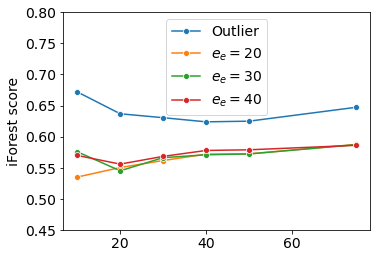

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


values = {  'ee': [20, 30, 40],
            'no': [60, 100, 140],
            'eb': [8, 16, 32],
            'lr': [0.0005, 0.001, 0.002]
           }

par_string = {
                'ee': 'e_e',
                'no': 'k',
                'eb': 'e_b',
                'lr': '\\eta'
                }

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
plt.rc('legend', fontsize=14) 

#sns.set_palette("colorblind")
#sns.set_style("darkgrid")


plt.figure(figsize=(5.5,4))

#sns.set_palette("colorblind")
#sns.set_style("darkgrid")

#plt.subplot(2,1,1)
sns.lineplot(x=[10,20,30,40,50,75], y=scores_r.mean(axis=-2)[0, :, 4], marker="o", label="Outlier")
for i in range(len(data_paths)):
    #'-s', label='alpha={:.1f}'.format(0.1*(i+1)))
    sns.lineplot(x=[10,20,30,40,50,75], y=scores_r.mean(axis=-2)[i, :, 5], marker="o", label="${}={}$".format(par_string[par], values[par][i]))
plt.legend()
plt.ylim(0.45,0.8)
#plt.xticks([10,20,30,40,50,75])
plt.ylabel('iForest score')
plt.savefig(f'parameter_{par}_mask_if.eps'.format(par))

## Loss

In [85]:
alpha = 1

data = {1: ['tests/logs/paper_exp/alpha1_0.8', 'tests/logs/paper_exp/alpha1_1.0', 'tests/logs/paper_exp/alpha1_1.2'],
        2: ['tests/logs/paper_exp/alpha2_0.8', 'tests/logs/paper_exp/alpha2_1.0', 'tests/logs/paper_exp/alpha2_1.2'],
        3:['tests/logs/paper_exp/alpha3_0.1', 'tests/logs/paper_exp/alpha3_0.3', 'tests/logs/paper_exp/alpha3_0.5']}
dataset_path = 'datasets/synthetic/processed/'

files = os.listdir(dataset_path)
files.sort()

data_paths = data[alpha]
scores = []
    
for data_path in data_paths:
    for f in files:
        if not (f.startswith('info_') or ('100' in f)):
            mask_scores = pickle.load(open(os.path.join(data_path, f'mask_scores_{f.replace(".csv", ".joblib")}'), 'rb'))
            m_scores = []
            for ms in mask_scores:
                for m in ms:
                    for p in m:
                        m_scores.append([1.0 if p[4] > (p[5]+p[4]/50) else 0.0])
            scores.append(np.array(m_scores).mean())

In [116]:
scores_r = np.array(scores).reshape((len(data_paths),-1, 3))

In [117]:
print(scores_r.shape)
scores_r.mean(axis=-1)

(3, 6, 3)


array([[0.99166667, 0.99122807, 0.97802546, 0.94593319, 0.87211004,
        0.87046137],
       [0.83233555, 0.79567075, 0.70053988, 0.58227727, 0.50385698,
        0.48691314],
       [0.61671335, 0.61613806, 0.56260194, 0.39265233, 0.31798565,
        0.36376398]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


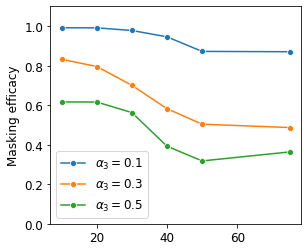

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4.5,4))

#sns.set_palette("colorblind")
#sns.set_style("darkgrid")

#plt.subplot(2,1,1)
for i in range(len(data_paths)):
    sns.lineplot(x=[10,20,30,40,50,75], y=scores_r.mean(axis=-1)[i], marker="o", label="$\\alpha_{}={}$".format(alpha, data_paths[i][-3:])) #'-s', label='alpha={:.1f}'.format(0.1*(i+1)))
plt.legend()
plt.ylim(0.0,1.1)
#plt.xticks([10,20,30,40,50,75])
plt.ylabel('Masking efficacy')
plt.savefig(f'parameter_alpha{alpha}_mask.eps'.format(alpha))

# Real datasets 
Mask quality

In [ ]:
from sklearn.ensemble import IsolationForest as IForest

#dataset_paths = {'cardio': 'cardio_1685605801.579052',
#             'breast': 'breast_1685605801.3900645',
#             'ionosphere': 'ionosphere_1685605801.3333552',
#             'arrhythmia': 'arrhythmia_1685605801.5731122',
#            'musk': 'musk_1685605801.362368'}

#dataset_paths = {'cardio': 'cardio_1685699043.676444',
#             'breast': 'breast_1685699044.071625',
#             'ionosphere': 'ionosphere_1685699044.134206',
#             'arrhythmia': 'arrhythmia_1685700206.786617',
#            'musk': 'musk_1685699043.5538688'}

#dataset_paths = {'cardio': 'cardio_1685705739.3934853',
#             'breast': 'breast_1685705739.3628566',
#             'ionosphere': 'ionosphere_1685705739.0082045',
#             'arrhythmia': 'arrhythmia_1685707915.3712327',
#            'musk': 'musk_1685705739.223749'}

#dataset_paths = {'cardio': 'cardio_1685801943.9156919',
#             'breast': 'breast_1685801943.3232358',
#             'ionosphere': 'ionosphere_1685801943.5839376',
#             'arrhythmia': 'arrhythmia_1685801943.55852',
#            'musk': 'musk_1685801943.9017832'}

# Multi run
dataset_paths = {'cardio': 'cardio_1685828451.2208996',
             'breast': 'breast_1685828451.6128614',
             'ionosphere': 'ionosphere_1685828450.8401275',
             'arrhythmia': 'arrhythmia_1685828451.617122',
            'musk': 'musk_1685828451.6472118'}

test = 'tests/logs'

mask_scores = []


for dataset in dataset_paths.keys():
    for r in range(5):
        data_path = os.path.join(test, dataset_paths[dataset])
        data = pd.read_csv(f'datasets/data/{dataset}.csv')
        x_train = data.iloc[:, :data.shape[1] - 1].to_numpy()
        y_train = data.iloc[:,data.shape[1] - 1].to_numpy()

        explanations = pickle.load(open(os.path.join(data_path, f"itemsets_{dataset}_{r}"), 'rb'))
        patches = pickle.load(open(os.path.join(data_path, f"patches_{dataset}_{r}"), 'rb'))

        if_s = IForest()
        if_s.fit(x_train)

        scores = []
        i = 0

        for o in np.argwhere(y_train!=0):

            sample_to_explain = x_train[o]

            point_scores = []

            if len(explanations[i]) == 0:
                pos_l_b = pos_l_a = pos_g_b = pos_g_a = np.NaN
            else:
                it_scores = []

                for j in range(len(explanations[i])):
                    e = list(explanations[i][j])
                    npt = patches[i][j]

                    if_s_s = IForest()
                    if_s_s.fit(x_train[:, e])

                    ptc_scores = []
                    for p in npt:
                        pos_g_a = - if_s.score_samples(p.reshape(1, -1))[0]
                        pos_g_b = - if_s.score_samples(sample_to_explain)[0]

                        pos_l_a = - if_s_s.score_samples(p.reshape(1, -1)[:, e])[0]
                        pos_l_b = - if_s_s.score_samples(sample_to_explain[:, e])[0]

                        ptc_scores.append([pos_g_b, pos_g_a, pos_l_b, pos_l_a])
                    it_scores.append(ptc_scores)
            scores.append(it_scores)
            i += 1
        pickle.dump(scores, open(os.path.join(data_path, f'mask_scores_{dataset}_{r}'), 'wb'))
        mask_scores.append(scores)

In [79]:
#dataset_paths = {'cardio': 'cardio_1685605801.579052',
#             'breast': 'breast_1685605801.3900645',
#             'ionosphere': 'ionosphere_1685605801.3333552',
#             'arrhythmia': 'arrhythmia_1685605801.5731122',
#            'musk': 'musk_1685605801.362368'}

# alpha3
#dataset_paths = {'cardio': 'cardio_1685699043.676444',
#             'breast': 'breast_1685699044.071625',
#             'ionosphere': 'ionosphere_1685699044.134206',
#             'arrhythmia': 'arrhythmia_1685700206.786617',
#            'musk': 'musk_1685699043.5538688'}

# ---------------------------------------------------------
#dataset_paths = {'cardio': 'cardio_1685705739.3934853',
#             'breast': 'breast_1685705739.3628566',
#             'ionosphere': 'ionosphere_1685705739.0082045',
#             'arrhythmia': 'arrhythmia_1685707915.3712327',
#            'musk': 'musk_1685705739.223749'}
# ---------------------------------------------------------

#dataset_paths = {'cardio': 'cardio_1685801943.9156919',
#             'breast': 'breast_1685801943.3232358',
#             'ionosphere': 'ionosphere_1685801943.5839376',
#             'arrhythmia': 'arrhythmia_1685801943.55852',
#            'musk': 'musk_1685801943.9017832'}

# Multi run
dataset_paths = {'cardio': 'cardio_1685828451.2208996',
             'breast': 'breast_1685828451.6128614',
             'ionosphere': 'ionosphere_1685828450.8401275',
             'arrhythmia': 'arrhythmia_1685828451.617122',
            'musk': 'musk_1685828451.6472118'}


test = 'tests/logs'
scores = []

for dataset in dataset_paths.keys():
    for r in range(5):
        data_path = os.path.join(test, dataset_paths[dataset])
        mask_scores = pickle.load(open(os.path.join(data_path, f'mask_scores_{dataset}_{r}'), 'rb'))
        m_scores = []
        for ms in mask_scores:
            for m in ms:
                for p in m:
                    #m_scores.append([1 if p[2] > (p[3]+p[2]/50) else 0])
                    m_scores.append([1 if (p[2]-p[3]) > p[2]/20 else 0])
        scores.append(np.array(m_scores).mean())

In [77]:
# Multi run
dataset_paths = {'cardio': 'cardio_1685828451.2208996',
             'breast': 'breast_1685828451.6128614',
             'ionosphere': 'ionosphere_1685828450.8401275',
             'arrhythmia': 'arrhythmia_1685828451.617122',
            'musk': 'musk_1685828451.6472118'}


test = 'tests/logs'
scores = []

for dataset in dataset_paths.keys():
    for r in range(5):
        data_path = os.path.join(test, dataset_paths[dataset])
        mask_scores = pickle.load(open(os.path.join(data_path, f'mask_scores_{dataset}_{r}'), 'rb'))
        m_scores = []
        for ms in mask_scores:
            for m in ms:
                for p in m:
                    #m_scores.append([1 if p[2] > (p[3]+p[2]/50) else 0])
                    m_scores.append(p)
        scores.append(np.array(m_scores).mean(axis=0))
        break

In [83]:
np.array(scores)

array([[0.51156379, 0.48358369, 0.69430838, 0.57423725],
       [0.45710636, 0.44634224, 0.57581473, 0.46706479],
       [0.53037265, 0.50871318, 0.61362756, 0.46314214],
       [0.40769215, 0.39466203, 0.76036847, 0.43727916],
       [0.56569402, 0.56132236, 0.77730399, 0.5106577 ]])

In [80]:
print(np.array(scores).reshape((-1, 5)).mean(axis=-1))
print(np.array(scores).reshape((-1, 5)).std(axis=-1))

[0.82184319 0.81623179 0.87463347 1.         0.98400112]
[0.01357494 0.02691306 0.0143246  0.         0.01130258]


In [ ]:
[0.84375,
 0.6317567567567568,
 0.8616352201257862,
 0.8849557522123894,
 0.5695364238410596]

In [8]:
#dataset_paths = {'cardio': 'cardio_1685605801.579052',
#             'breast': 'breast_1685605801.3900645',
#             'ionosphere': 'ionosphere_1685605801.3333552',
#             'arrhythmia': 'arrhythmia_1685605801.5731122',
#            'musk': 'musk_1685605801.362368'}

#dataset_paths = {'cardio': 'cardio_1685699043.676444',
#             'breast': 'breast_1685699044.071625',
#             'ionosphere': 'ionosphere_1685699044.134206',
#             'arrhythmia': 'arrhythmia_1685700206.786617',
#            'musk': 'musk_1685699043.5538688'}

# -------------------------------------------------------

#dataset_paths = {'cardio': 'cardio_1685705739.3934853',
#             'breast': 'breast_1685705739.3628566',
#             'ionosphere': 'ionosphere_1685705739.0082045',
#             'arrhythmia': 'arrhythmia_1685707915.3712327',
#            'musk': 'musk_1685705739.223749'}

# -------------------------------------------------------

#dataset_paths = {'cardio': 'cardio_1685801943.9156919',
#             'breast': 'breast_1685801943.3232358',
#             'ionosphere': 'ionosphere_1685801943.5839376',
#             'arrhythmia': 'arrhythmia_1685801943.55852',
#            'musk': 'musk_1685801943.9017832'}

# Multi run
dataset_paths = {'cardio': 'cardio_1685828451.2208996',
             'breast': 'breast_1685828451.6128614',
             'ionosphere': 'ionosphere_1685828450.8401275',
             'arrhythmia': 'arrhythmia_1685828451.617122',
            'musk': 'musk_1685828451.6472118'}

test = 'tests/logs'
scores = []

for dataset in dataset_paths.keys():
    for r in range(5):
        print(dataset, 'R: ', r)
        data_path = os.path.join(test, dataset_paths[dataset])
        mask_scores = pickle.load(open(os.path.join(data_path, f'mask_scores_{dataset}_{r}'), 'rb'))
        m_scores = []
        for ms in mask_scores:
            mid_scores = []
            for m in ms:
                if m[0][2] != np.NaN:
                    #mid_scores.append(m[0][2]>0.55)
                    mid_scores.append(m[0][0])
            m_scores.append(np.array(mid_scores).mean())
        #print(m_scores)
        scores.append(np.array(m_scores).mean())

cardio R:  0
cardio R:  1
cardio R:  2
cardio R:  3
cardio R:  4
breast R:  0
breast R:  1
breast R:  2
breast R:  3
breast R:  4
ionosphere R:  0
ionosphere R:  1
ionosphere R:  2
ionosphere R:  3
ionosphere R:  4
arrhythmia R:  0
arrhythmia R:  1
arrhythmia R:  2
arrhythmia R:  3
arrhythmia R:  4
musk R:  0
musk R:  1
musk R:  2
musk R:  3
musk R:  4


In [9]:
print(np.array(scores).reshape((-1, 5)).mean(axis=-1))
print(np.array(scores).reshape((-1, 5)).std(axis=-1))

[0.51177201 0.45661764 0.52663843 0.41616176 0.5602582 ]
[0.00470441 0.00419738 0.0009794  0.00704334 0.00566874]


In [ ]:
[0.9772727272727273,
 0.47641509433962265,
 0.8015873015873016,
 0.8787878787878788,
 1.0]

In [51]:
dataset_paths = {'cardio': 'cardio_1685605801.579052',
             'breast': 'breast_1685605801.3900645',
             'ionosphere': 'ionosphere_1685605801.3333552',
             'arrhythmia': 'arrhythmia_1685605801.5731122',
            'musk': 'musk_1685605801.362368'}

test = 'tests/logs'

mask_scores = []


for dataset in dataset_paths.keys():
    print(dataset)
    data_path = os.path.join(test, dataset_paths[dataset])
    data = pd.read_csv(f'datasets/data/{dataset}.csv')
    x_train = data.iloc[:, :data.shape[1] - 1].to_numpy()
    y_train = data.iloc[:,data.shape[1] - 1].to_numpy()

    explanations = pickle.load(open(os.path.join(data_path, f"itemsets_{dataset}"), 'rb'))
    patches = pickle.load(open(os.path.join(data_path, f"patches_{dataset}"), 'rb'))

    scores = []
    i = 0

    for o in np.argwhere(y_train!=0):
        
        sample_to_explain = x_train[o]

        point_scores = []

        if len(explanations[i]) == 0:
            print('No explanation')
        else:
            it_scores = []

            for j in range(len(explanations[i])):
                e = list(explanations[i][j])
                print(e)
        i += 1

cardio
[19]
[6]
[7]
[7]
[7]
[2, 6]
[16]
[20, 7]
[20]
[9, 3, 7]
[3, 20, 7]
[9, 3]
[9, 3]
[9]
[9, 7]
[6]
[9, 3]
[9, 3]
[9]
[9, 3]
[9]
[3, 7]
[9]
[9, 20, 7]
[9]
[9]
[9, 3]
[9, 7]
[0, 9, 7]
[9, 3]
[9]
[9, 3]
[9, 3]
[9, 3]
[9]
[9, 3]
[9]
[9, 3]
[9, 3]
[9, 20, 7]
[9, 20, 7]
[9, 20, 7]
[9, 7]
[9, 7]
[9, 7]
[0, 9, 7]
[9, 3, 7]
[9, 3, 7]
[9, 7]
[3, 7]
[20]
[9, 3]
[9, 3, 20]
[9]
[9, 3]
[9, 3, 20, 7]
[9, 3, 20]
[9, 3, 20]
[18]
[6]
[16, 1, 6]
[14]
[16]
[6]
[6, 7]
[2]
[6]
[6]
[7]
[2]
[9]
[9, 3, 20]
[9, 3, 7]
[3, 7]
[9, 3, 7]
[3, 12]
[9]
[9, 3]
[9]
[9]
[9, 3]
[9, 3, 20]
[9]
[9]
[6, 15]
[6]
[6]
[18, 13]
[6]
[16]
[16, 0, 18, 6]
[16, 18, 4]
[16, 3]
[6]
[13]
[6]
[6]
[13, 6]
[8, 18]
[18, 6]
[6]
[6]
[16]
[6]
[6]
[19]
[6]
[6]
[6]
[6]
[16]
[16, 19, 4]
[3, 4]
[19]
[16, 19, 6]
[19, 6]
[18, 6]
[16, 6]
[19]
[6]
[16, 6]
[3, 6]
[6]
[20]
[6, 14]
[13, 6]
[6]
[3, 4]
[16]
[16]
[18]
[16, 18]
[17, 18]
[4, 6]
[19, 6]
[19]
[19, 15]
[3, 19, 15]
[17, 19]
[16]
[16]
[16, 6]
[17, 6]
[6]
[16]
[6]
[16, 19]
[16, 7]
[7]
[6]
[6, 7

## Results competitors

### COIN

In [262]:
from sklearn.ensemble import IsolationForest as IForest

test = 'tests/logs'

datasets = ['cardio', 'breast','ionosphere','arrhythmia','musk']

mask_scores = []

for dataset in datasets:
    print(dataset)
    path = f'/home/simona/Simona/outExp/outlier-interpretation/record/coin/{dataset}'
    
    data_path = os.path.join(test, dataset_paths[dataset])
    data = pd.read_csv(f'datasets/data/{dataset}.csv')
    x_train = data.iloc[:, :data.shape[1] - 1].to_numpy()
    y_train = data.iloc[:,data.shape[1] - 1].to_numpy()
    
    for r in range(5):
        print(r)
        chooses = pickle.load(open(path+f'/choose_{dataset}_{r}.joblib', 'rb'))[0]

        if_s = IForest()
        if_s.fit(x_train)

        scores = []
        i = 0

        for o in np.argwhere(y_train!=0):

            sample_to_explain = x_train[o]

            point_scores = []

            if len(chooses[i]) == 0:
                pos_l_b = pos_l_a = pos_g_b = pos_g_a = np.NaN
            else:
                if_s_s = IForest()
                if_s_s.fit(x_train[:, chooses[i]])
                pos_g_b = - if_s.score_samples(sample_to_explain)[0]
                pos_l_b = - if_s_s.score_samples(sample_to_explain[:, chooses[i]])[0]

            #scores.append(1.0 if pos_l_b > 0.55 else 0.0)
            scores.append(pos_l_b)
            i += 1
        #pickle.dump(scores, open(os.path.join(data_path, f'mask_scores_{dataset}'), 'wb'))
        print(np.array(scores).mean())
        mask_scores.append(np.array(scores).mean())

cardio


NameError: name 'dataset_paths' is not defined

In [13]:
mask_scores_r = np.array(mask_scores).reshape((-1, 5))
print(mask_scores_r.mean(axis=-1))
print(mask_scores_r.std(axis=-1))

[0.64021769 0.53539861 0.62923547 0.75179984 0.74189953]
[0.00116341 0.0006851  0.00111109 0.00129172 0.00139609]


### ATON

In [ ]:
from sklearn.ensemble import IsolationForest as IForest

test = 'tests/logs'

datasets = ['cardio', 'breast','ionosphere','arrhythmia','musk']

mask_scores = []

for dataset in datasets:
    print(dataset)
    path = f'/home/simona/Simona/outExp/outlier-interpretation/record/aton/{dataset}'
    
    data_path = os.path.join(test, dataset_paths[dataset])
    data = pd.read_csv(f'datasets/data/{dataset}.csv')
    x_train = data.iloc[:, :data.shape[1] - 1].to_numpy()
    y_train = data.iloc[:,data.shape[1] - 1].to_numpy()
    
    for r in range(5):
        print(r)
        chooses = pickle.load(open(path+f'/choose_{dataset}_{r}.joblib', 'rb'))[0]

        if_s = IForest()
        if_s.fit(x_train)

        scores = []
        i = 0

        for o in np.argwhere(y_train!=0):

            sample_to_explain = x_train[o]

            point_scores = []

            if len(chooses[i]) == 0:
                pos_l_b = pos_l_a = pos_g_b = pos_g_a = np.NaN
            else:
                if_s_s = IForest()
                if_s_s.fit(x_train[:, chooses[i]])
                pos_g_b = - if_s.score_samples(sample_to_explain)[0]
                pos_l_b = - if_s_s.score_samples(sample_to_explain[:, chooses[i]])[0]

            #scores.append(1.0 if pos_l_b > 0.55 else 0.0)
            scores.append(pos_l_b)
            i += 1
        #pickle.dump(scores, open(os.path.join(data_path, f'mask_scores_{dataset}'), 'wb'))
        print(np.array(scores).mean())
        mask_scores.append(np.array(scores).mean())

cardio
0
0.6736338167649335
1
0.674121228378416
2
0.6732947366834442
3
0.6737462759738034
4
0.6740399819064987
breast
0
0.5413778695072406
1


In [16]:
mask_scores_r = np.array(mask_scores).reshape((-1, 5))
print(mask_scores_r.mean(axis=-1))
print(mask_scores_r.std(axis=-1))

[0.67376721 0.53967682 0.61511818 0.70820491 0.68663724]
[0.00029705 0.00116001 0.00204053 0.00788671 0.00192521]


# Evaluate ATON and COIN subspaces

In [257]:
from sklearn.ensemble import IsolationForest as IForest

dataset_path = 'datasets/synthetic/processed/'
test = '/home/simona/Simona/outExp/outlier-interpretation/test_new_ds'
algorithm = 'aton'

test_files = os.listdir(test)

mask_scores = []

files = os.listdir(dataset_path)
files.sort()

for f in files:
    if not (f.startswith('info_') or ('100' in f)):
        dataset = f.replace('.csv', '')
        for tf in test_files:
            if dataset in tf:
                print(f)
                print(tf)
                path = f'/home/simona/Simona/outExp/outlier-interpretation/record/coin/{dataset}'

                data_path = os.path.join(test, dataset_path)
                data = pd.read_csv(f'{dataset_path}/{dataset}.csv')
                x_train = data.iloc[:, :data.shape[1] - 1].to_numpy()
                y_train = data.iloc[:,data.shape[1] - 1].to_numpy()

                for r in range(1):
                    print(r)
                    #chooses = pickle.load(open(path+f'/choose_{dataset}_{r}.joblib', 'rb'))[0]
                    chooses = pickle.load(open(test+f'/{tf}', 'rb'))
                    print('C: ', chooses)

                    if_s = IForest()
                    if_s.fit(x_train)

                    scores = []
                    i = 0

                    for o in np.argwhere(y_train!=0):

                        sample_to_explain = x_train[o]

                        point_scores = []

                        if len(chooses[i]) == 0:
                            pos_l_b = pos_l_a = pos_g_b = pos_g_a = np.NaN
                        else:
                            if_s_s = IForest()
                            if_s_s.fit(x_train[:, chooses[i]])
                            pos_g_b = - if_s.score_samples(sample_to_explain)[0]
                            pos_l_b = - if_s_s.score_samples(sample_to_explain[:, chooses[i]])[0]

                        #scores.append(1.0 if pos_l_b > 0.55 else 0.0)
                        scores.append(pos_l_b)
                        i += 1
                    #pickle.dump(scores, open(os.path.join(data_path, f'mask_scores_{dataset}'), 'wb'))
                    print(np.array(scores).mean())
                    mask_scores.append(np.array(scores).mean())

synth_multidim_010_000.csv
f_choose aton synth_multidim_010_000 1710512580.3437796.joblib
0
C:  [[1, 5, 8, 9], [0, 1, 2, 4], [6, 7, 8], [0, 1, 2, 3], [0, 3, 4, 5], [2, 3, 4, 5], [0, 1, 7, 9], [5, 8, 9], [0, 1, 2], [0, 1, 5], [0, 3, 4, 7], [2, 3, 4, 5], [0, 8, 9], [0, 2, 3, 5], [4, 6, 7, 8], [3, 6, 7], [0, 6, 7], [1, 8, 9], [3, 5, 8, 9]]
0.656073509926566
synth_multidim_010_000.csv
f_choose coin synth_multidim_010_000 1710512574.919826.joblib
0
C:  [[8, 9], [0, 1], [6, 7], [0, 1], [0, 1, 2, 3, 4, 5, 8], [2, 3, 4, 5], [0, 1], [8, 9], [0, 1], [0, 1], [0, 2, 3, 4, 5, 7, 9], [1, 2, 3, 4, 5, 7], [8, 9], [0, 2, 3, 4, 5, 6, 9], [6, 7], [6, 7], [6, 7], [8, 9], [8, 9]]
0.6907200882246496
synth_multidim_010_001.csv
f_choose coin synth_multidim_010_001 1710512608.349631.joblib
0
C:  [[0, 1, 2, 3, 8], [8, 9], [1, 6, 7, 9], [0, 1, 2, 3, 8, 9], [6, 7], [0, 1, 2, 3], [4, 5], [0, 1, 2, 3, 4, 7, 8], [6, 7], [6, 7], [4, 5], [4, 5], [0, 1, 2, 3, 6], [4, 5], [2, 5, 6, 7], [8, 9], [4, 5], [0, 8, 9], [8, 9]]

0.5923847745355354
synth_multidim_030_000.csv
f_choose aton synth_multidim_030_000 1710512635.1016803.joblib
0
C:  [[2, 8, 9, 13, 22, 24], [5, 6, 7, 12, 18, 23], [14, 18, 19, 22, 24, 25], [4, 5, 6, 11, 18], [0, 13, 14, 19, 23, 29], [13, 15, 17, 21, 26, 29], [2, 7, 15, 17, 24, 25], [1, 2, 9, 16, 28, 29], [3, 11, 12, 13, 15, 28], [7, 10, 12, 13, 14, 28], [10, 11, 18, 19, 26, 28], [4, 6, 7, 15, 19, 22], [6, 9, 20, 21, 22, 23], [2, 15, 16, 17, 18, 20], [4, 6, 8, 13, 17, 25], [1, 6, 9, 18, 21, 29], [4, 6, 7, 12, 15, 26], [1, 2, 5, 9, 11, 25], [1, 2, 10, 11, 19, 20, 25], [13, 15, 16, 20, 22, 26, 29], [3, 16, 17, 19, 21, 27], [9, 15, 20, 21, 22, 23], [6, 7, 16, 22, 26, 27], [2, 4, 5, 17, 23, 27], [1, 11, 22, 27, 28, 29], [2, 8, 9, 10, 11, 21], [9, 11, 14, 15, 16, 29], [1, 8, 21, 22, 23, 26], [4, 5, 6, 9, 12, 28], [0, 3, 8, 9, 10, 11, 25], [0, 1, 2, 16, 22, 29], [6, 8, 10, 11, 14, 29], [1, 2, 4, 5, 17, 18], [7, 8, 15, 21, 23, 29], [4, 6, 7, 11, 16, 17], [1, 6, 17, 20, 24, 25], [12, 13, 14, 16,

0.5843873406251219
synth_multidim_040_000.csv
f_choose aton synth_multidim_040_000 1710512678.5602758.joblib
0
C:  [[8, 10, 11, 13, 21, 23, 28], [1, 5, 9, 15, 18, 19, 36], [1, 4, 5, 6, 14, 25, 34], [2, 8, 10, 30, 31, 32, 34], [3, 5, 8, 13, 14, 21, 22], [1, 4, 8, 13, 20, 21, 23, 39], [10, 16, 20, 23, 24, 29, 30], [6, 7, 22, 28, 29, 30, 32], [3, 13, 21, 27, 28, 31, 37, 38], [5, 8, 15, 22, 24, 29, 37], [6, 8, 10, 11, 32, 37], [0, 16, 21, 28, 30, 34, 37], [4, 11, 12, 17, 22, 26, 38], [4, 6, 18, 26, 32, 34, 36], [2, 8, 14, 15, 18, 28, 38], [15, 18, 21, 31, 32, 33, 34], [3, 7, 10, 23, 26, 31, 34], [0, 19, 24, 31, 32, 33, 34], [5, 12, 16, 22, 29, 35], [3, 5, 20, 21, 25, 30, 32], [2, 7, 11, 12, 13, 25, 28], [2, 4, 5, 14, 35, 38, 39], [8, 16, 20, 22, 24, 33, 35], [8, 20, 22, 25, 28, 29, 30], [3, 14, 16, 19, 23, 34, 35], [7, 9, 13, 18, 19, 26, 39], [1, 4, 6, 13, 16, 28, 38], [0, 15, 25, 30, 33, 36, 37], [2, 5, 9, 11, 18, 28, 35], [0, 10, 21, 22, 27, 28, 31], [0, 1, 4, 21, 26, 33, 36], [1, 3, 4, 

0.5979791402563925
synth_multidim_040_002.csv
f_choose aton synth_multidim_040_002 1710512713.3967962.joblib
0
C:  [[0, 13, 16, 20, 31, 33, 36], [1, 6, 10, 15, 22, 34, 38], [2, 10, 13, 25, 26, 28, 33], [4, 8, 11, 14, 21, 26], [4, 6, 10, 11, 14, 15, 18, 36], [4, 7, 9, 12, 15, 19, 34], [2, 3, 14, 15, 24, 31, 35], [0, 5, 7, 15, 20, 27, 33], [2, 18, 21, 23, 26, 27, 38], [7, 12, 19, 20, 27, 31, 38], [2, 10, 12, 13, 27, 35, 36], [4, 5, 7, 24, 26, 27, 29], [2, 4, 8, 10, 23, 27, 39], [0, 7, 14, 15, 20, 23, 39], [0, 3, 4, 15, 18, 24, 36], [3, 14, 23, 28, 29, 35, 38], [2, 3, 4, 15, 30, 36], [4, 9, 26, 30, 35, 38, 39], [20, 21, 22, 24, 25, 33, 36], [0, 4, 6, 22, 26, 27, 36], [6, 11, 21, 23, 28, 29, 39], [5, 6, 17, 19, 22, 26, 34], [3, 6, 13, 16, 23, 25, 29], [13, 16, 18, 20, 21, 27, 30], [0, 4, 8, 18, 26, 28, 36], [3, 12, 17, 18, 21, 23, 24], [3, 5, 7, 9, 17, 28, 37], [2, 5, 6, 7, 14, 36], [5, 9, 14, 18, 35, 36], [1, 5, 9, 11, 21, 26, 35], [7, 10, 14, 15, 20, 33], [5, 13, 14, 15, 17, 27, 32], [6,

0.5870666949690518
synth_multidim_050_001.csv
f_choose aton synth_multidim_050_001 1710512757.5126636.joblib
0
C:  [[2, 5, 20, 28, 47, 48, 49], [16, 19, 20, 22, 24, 38], [6, 11, 15, 31, 35, 40, 41, 43], [5, 9, 15, 19, 22, 24, 26, 35], [2, 3, 9, 21, 26, 27, 28, 43], [14, 24, 30, 38, 39, 41, 42, 49], [5, 15, 16, 32, 38, 42, 43, 46], [10, 14, 20, 24, 40, 41, 43, 46], [3, 20, 23, 27, 30, 34, 37, 45], [5, 6, 10, 13, 19, 20, 23, 24], [1, 2, 6, 9, 13, 33, 44, 45], [1, 13, 23, 32, 33, 38, 43, 45], [6, 7, 8, 9, 16, 24, 41], [13, 14, 17, 20, 22, 26, 38, 49], [11, 14, 22, 23, 29, 41, 47, 49], [10, 25, 33, 34, 36, 39, 47, 48], [9, 11, 14, 16, 23, 25, 31, 48], [4, 6, 9, 12, 21, 22, 38, 47], [13, 19, 34, 35, 36, 40, 41], [1, 3, 5, 8, 9, 23, 31], [1, 13, 16, 24, 26, 30, 31, 48], [4, 5, 6, 9, 14, 15, 41, 47], [5, 7, 24, 29, 30, 32, 48], [2, 6, 11, 18, 23, 26, 41, 47], [3, 9, 20, 21, 23, 44, 46], [2, 3, 21, 26, 34, 41, 43], [9, 10, 27, 36, 44, 45, 48, 49], [4, 8, 12, 19, 44, 45, 46], [2, 8, 9, 10, 18, 

0.6343058197122828
synth_multidim_050_002.csv
f_choose coin synth_multidim_050_002 1710513621.5232487.joblib
0
C:  [[0, 2, 4, 8, 9, 12, 17, 19, 22, 25, 26, 27, 29, 32, 39, 40, 46], [0, 1, 4, 6, 8, 13, 14, 23, 30, 31, 32, 33, 35, 41, 42, 46, 49], [1, 2, 4, 9, 17, 18, 19, 20, 22, 24, 26, 29, 32, 33, 34, 35, 36, 38, 46], [2, 6, 7, 9, 10, 12, 14, 16, 22, 24, 25, 27, 29, 32, 33, 35, 37, 39, 42, 44, 48], [4, 7, 8, 11, 12, 14, 17, 19, 21, 24, 26, 29, 30, 31, 33, 37, 38, 47], [4, 6, 13, 16, 21, 25, 27, 30, 33, 35, 36, 37, 39, 43, 46, 47], [1, 2, 3, 4, 5, 7, 9, 10, 11, 13, 19, 21, 23, 24, 26, 29, 34, 35, 36, 41, 42, 48], [0, 3, 6, 11, 14, 16, 17, 20, 22, 24, 25, 26, 31, 32, 35, 36, 41, 43, 47, 49], [0, 2, 3, 4, 5, 10, 13, 19, 20, 22, 25, 26, 27, 34, 36, 37, 38, 42, 43, 44], [1, 3, 6, 10, 12, 13, 16, 17, 21, 22, 27, 29, 30, 31, 32, 34, 35, 36, 39, 43, 44, 46], [0, 7, 9, 16, 19, 22, 24, 28, 32, 36, 38, 39, 42, 44, 45, 49], [10, 13, 16, 19, 20, 21, 22, 24, 26, 27, 30, 32, 34, 35, 38, 41, 42, 43, 4

0.6418149991797473
synth_multidim_075_000.csv
f_choose coin synth_multidim_075_000 1710513807.6044166.joblib
0
C:  [[12, 14, 16, 18, 19, 22, 23, 26, 27, 31, 33, 34, 38, 44, 46, 47, 55, 56, 57, 61, 66, 67], [5, 14, 19, 21, 29, 36, 42, 43, 45, 48, 55, 56, 58, 59, 60, 61, 63, 64, 66, 73, 74], [0, 8, 12, 15, 16, 17, 18, 24, 25, 27, 28, 33, 38, 41, 42, 46, 48, 53, 54, 56, 60, 61, 65, 70, 73], [4, 5, 11, 12, 14, 15, 28, 29, 33, 35, 39, 42, 46, 47, 49, 54, 58, 71], [2, 3, 5, 13, 14, 18, 23, 28, 35, 36, 39, 43, 46, 47, 52, 53, 56, 60, 69, 72, 73, 74], [2, 3, 5, 7, 8, 13, 15, 17, 23, 24, 27, 30, 36, 37, 43, 46, 48, 50, 55, 57, 59, 61, 64, 68], [1, 9, 12, 13, 15, 16, 22, 23, 27, 28, 30, 35, 38, 42, 44, 47, 48, 50, 54, 57, 58, 59, 61, 62, 70, 71, 72, 73], [1, 2, 4, 6, 10, 12, 21, 27, 28, 31, 32, 33, 35, 44, 46, 47, 50, 51, 56, 57, 61, 69, 70], [4, 6, 7, 11, 17, 19, 21, 24, 25, 28, 29, 38, 40, 42, 47, 53, 56, 59, 62, 68, 71, 73], [3, 7, 8, 9, 11, 21, 23, 25, 36, 38, 40, 43, 55, 61, 64, 66, 71, 73,

0.5969764084995027
synth_multidim_075_001.csv
f_choose aton synth_multidim_075_001 1710512852.2541611.joblib
0
C:  [[1, 2, 5, 7, 18, 25, 32, 54, 64, 73], [7, 13, 20, 21, 33, 36, 41, 56, 70], [2, 5, 10, 27, 31, 36, 44, 48, 51], [0, 13, 16, 20, 30, 46, 50, 53, 71, 74], [0, 21, 48, 54, 57, 58, 60, 61, 70], [2, 16, 26, 33, 41, 44, 48, 56, 59], [3, 11, 12, 13, 18, 24, 35, 43, 69], [2, 3, 20, 32, 34, 35, 49, 52, 72], [3, 4, 12, 16, 28, 32, 47, 53, 68], [3, 9, 15, 21, 56, 60, 64, 67, 73, 74], [0, 10, 11, 13, 23, 30, 39, 45, 56, 63], [1, 2, 9, 11, 17, 28, 30, 40, 43, 50], [8, 28, 29, 37, 39, 47, 56, 63, 72, 74], [2, 3, 6, 7, 26, 40, 42, 45, 49, 71], [1, 21, 34, 36, 42, 51, 61, 62, 69, 74], [10, 12, 13, 17, 25, 33, 36, 50, 66], [16, 22, 23, 45, 53, 55, 57, 67, 74], [10, 20, 26, 31, 34, 46, 49, 59, 63], [13, 14, 31, 41, 45, 50, 70, 73, 74], [3, 8, 13, 26, 48, 49, 60, 71, 72, 74], [13, 15, 18, 23, 29, 42, 45, 47, 56], [5, 10, 12, 24, 26, 44, 62, 65, 66], [2, 6, 8, 11, 13, 28, 47, 60, 70, 71], [0,

0.6003479145995649
synth_multidim_075_002.csv
f_choose coin synth_multidim_075_002 1710514182.110667.joblib
0
C:  [[0, 3, 4, 17, 20, 22, 23, 26, 28, 31, 33, 37, 41, 47, 49, 59, 62], [10, 13, 17, 20, 22, 24, 29, 30, 31, 32, 33, 34, 36, 37, 44, 45, 48, 59, 62, 72], [2, 3, 6, 8, 10, 11, 13, 17, 19, 23, 26, 27, 28, 33, 36, 37, 38, 43, 46, 48, 55, 58, 59, 61, 64, 69, 74], [0, 4, 5, 7, 11, 13, 17, 18, 24, 27, 28, 32, 33, 34, 38, 40, 42, 43, 44, 52, 53, 59, 60, 67, 69], [0, 7, 11, 13, 14, 20, 27, 29, 30, 42, 43, 44, 49, 50, 51, 53, 54, 55, 57, 62, 63, 64, 69, 72], [7, 15, 16, 25, 26, 29, 38, 39, 43, 45, 59, 63, 73], [6, 12, 14, 16, 19, 21, 24, 25, 27, 28, 33, 34, 40, 41, 44, 48, 52, 53, 60, 63, 64, 68, 69, 70], [0, 5, 6, 10, 11, 17, 19, 22, 25, 32, 35, 37, 41, 43, 47, 59, 61, 64, 70, 72, 73], [2, 3, 7, 9, 14, 17, 22, 26, 28, 34, 36, 44, 47, 50, 53, 54, 57, 59, 63, 64, 65, 66, 70, 71], [1, 2, 4, 7, 10, 12, 16, 20, 22, 25, 26, 31, 35, 37, 40, 43, 48, 49, 51, 57, 58, 59, 61, 63, 65, 69, 70, 71, 

0.5997810836644941
synth_multidim_075_002.csv
f_choose aton synth_multidim_075_002 1710512882.3545895.joblib
0
C:  [[10, 28, 30, 35, 37, 38, 41, 49, 52], [14, 20, 21, 24, 36, 37, 45, 48, 62], [8, 33, 37, 46, 55, 58, 61, 64, 74], [2, 12, 17, 27, 42, 43, 48, 59, 67], [14, 20, 30, 32, 34, 35, 49, 53, 57], [6, 15, 37, 38, 43, 52, 60, 62, 63, 66], [12, 14, 25, 33, 40, 51, 52, 64, 68], [0, 6, 10, 11, 34, 35, 41, 73], [15, 35, 50, 54, 56, 59, 62, 66, 74], [4, 16, 22, 26, 48, 49, 51, 58, 59, 69], [0, 3, 17, 26, 34, 50, 55, 61, 64], [14, 39, 47, 52, 57, 60, 61, 74], [2, 10, 13, 14, 18, 24, 29, 60, 64], [6, 8, 10, 12, 34, 35, 50, 69], [22, 39, 45, 48, 51, 54, 60, 62, 69, 73], [6, 7, 35, 39, 46, 53, 55, 60, 70], [0, 3, 15, 24, 28, 31, 45, 67, 73], [0, 6, 8, 25, 42, 66, 67, 70], [5, 28, 33, 34, 38, 48, 56, 66, 70], [1, 14, 44, 47, 52, 55, 64, 68, 70], [2, 3, 7, 35, 45, 49, 52, 65], [9, 11, 16, 48, 62, 65, 70, 72, 74], [3, 5, 6, 13, 15, 19, 36, 52, 59, 61], [0, 1, 28, 53, 57, 59, 62, 63, 66], [0, 1

In [176]:
f

'synth_multidim_100_002.csv'

In [189]:
precisions = []
jaccards = []

f = 'synth_multidim_075_002.csv'

info_df = pd.read_csv(dataset_path+f.replace('synth_', 'info_synth_'))
subspaces = pickle.load(open(dataset_path+f.replace('synth_', 'info_synth_').replace('.csv', '.joblib'), 'rb'))

prec_f = []
jacc_f = []

explanations = pickle.load(open(os.path.join(data_path, f"itemsets_{f.replace('.csv', '.joblib')}"), 'rb'))
patches = pickle.load(open(os.path.join(data_path, f"patches_{f.replace('.csv', '.joblib')}"), 'rb'))

In [180]:
from itertools import chain

for i in range(len(explanations)):
    features = np.array(subspaces)[list(info_df.iloc[i, :info_df.shape[1]-1])]
    d_found = []
    for e in explanations[i]:
        d_found.extend(e)
    d_found = set(d_found)
    d_real = set(list(chain.from_iterable(features)))
    if len(d_found) > 0:
        prec = len(d_real.intersection(d_found)) / len(d_found)
    else:
        prec = 0
    jacc = len(d_real.intersection(d_found)) / len(d_real.union(d_found))
    jacc_f.append(jacc)
    prec_f.append(prec)

In [182]:
prec_f

[0.5,
 0.0,
 0.5,
 0.0,
 0.3333333333333333,
 0.5,
 0.3333333333333333,
 0.0,
 0.5,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.5,
 0.5,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 1.0,
 0.0,
 0.25,
 0.0,
 0.3333333333333333,
 1.0,
 0.0,
 0.25,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.6666666666666666,
 0.0,
 1.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.6666666666666666,
 0.3333333333333333,
 0.0,
 0.5,
 0.3333333333333333,
 0.0,
 0.3333333333333333,
 0.0,
 0.3333333333333333,
 1.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.5,
 0.0,
 0.0,
 0.5,
 0.3333333333333333,
 0.5,
 0.0,
 0.0,
 0.3333333333333333,
 0.3333333333333333,
 0.0,
 0.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6666666666666666,
 0.3333333333333333,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.5,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.5,
 0.25,
 0.0,
 0.0,
 

In [183]:
d_found = []
for e in explanations[1]:
    d_found.extend(e)

In [187]:
len(explanations[1])

1

In [229]:
print('PRED:')
print(d_found)
print('REAL:')
print(set(list(chain.from_iterable(features))))

PRED:
[24, 45, 62]
REAL:
{46.0, 47.0}


In [230]:
patches[1][0]

array([[-0.00106264,  0.42508999,  0.62513602,  0.0213891 ,  0.43195301,
         0.00144643,  0.443097  ,  0.53132701,  0.48679301,  0.57994801,
        -0.00206249,  0.52034801, -0.0123658 ,  0.89414698,  0.717489  ,
         0.59839797, -0.00534755, -0.0103793 ,  0.244854  ,  0.212832  ,
         0.95121002,  0.0601466 ,  0.67938799, -0.0018201 ,  0.57956648,
         0.0282651 ,  0.26331499,  0.64517498, -0.00807165,  0.10017   ,
         0.0043404 ,  0.0806412 ,  0.133201  ,  0.0109961 ,  0.839261  ,
         0.59098399,  0.94761801,  0.83507001,  0.50042999,  0.16466799,
         0.239501  ,  0.0133903 ,  0.403566  ,  0.216855  , -0.00607384,
         0.84480113,  0.0852121 ,  0.01399   ,  0.89252299,  0.0168655 ,
         0.50656003,  0.82566202, -0.0131032 ,  0.698663  ,  0.391249  ,
         0.424826  , -0.0242973 ,  0.84742397,  0.00720318,  0.57218301,
         0.0815043 ,  0.67727298,  0.40543735,  0.00893812,  0.101978  ,
        -0.00716795,  0.47972199, -0.00481986,  0.0

In [252]:
from sklearn.neighbors import NearestNeighbors
from explainers import AETabularMMmd_ae
import tensorflow as tf
from time import time

# Load data
data = pd.read_csv(dataset_path + f)
x_train = data.iloc[:, :data.shape[1] - 1].to_numpy()
y_train = data['class'].to_numpy()

in_shape = x_train.shape[1]
near_neigh = NearestNeighbors(n_neighbors=30)
near_neigh.fit(x_train[y_train == 0])

# -------------------- Try with more samples ---------------------------
_, y_normal = near_neigh.kneighbors(patches[1][0])#(x_train[y_train==1][1:2])
x_normal = x_train[y_train == 0][y_normal[0]]
#print('SHAPE: ', x_normal.shape)

mm_data_o = np.full_like(x_normal, fill_value=patches[1][0]) # x_train[y_train==1][1])
mm_data_i = x_normal

mm_data = [mm_data_o, mm_data_i]
#print('SHAPE: ', mm_data_o.shape)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

explainer = AETabularMMmd_ae.TabularMM(in_shape, x_train[y_train == 0], [1.0, 1.2, 0.3])
explainer.compile(optimizer=opt, run_eagerly=True)

start_time = time()
explainer.fit(mm_data, mm_data_i, batch_size=16, epochs=80, verbose=0)
tot_time = time() - start_time

300


In [253]:
new_sample, choose = explainer.explain([mm_data, mm_data], 0.5, combine=False)

In [254]:
choose

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [255]:
np.argwhere(choose>0.5)

array([[ 0, 34],
       [ 0, 36],
       [ 0, 69],
       [ 0, 72],
       [ 1, 34],
       [ 1, 36],
       [ 1, 69],
       [ 2, 34],
       [ 2, 36],
       [ 2, 69],
       [ 2, 72],
       [ 3, 34],
       [ 3, 36],
       [ 3, 69],
       [ 4, 34],
       [ 4, 36],
       [ 4, 69],
       [ 5, 34],
       [ 5, 36],
       [ 5, 69],
       [ 6, 34],
       [ 6, 36],
       [ 6, 69],
       [ 7, 34],
       [ 7, 36],
       [ 7, 69],
       [ 8, 34],
       [ 8, 36],
       [ 8, 69],
       [ 9, 34],
       [ 9, 36],
       [ 9, 69],
       [10, 34],
       [10, 36],
       [10, 69],
       [11, 34],
       [11, 36],
       [11, 69],
       [12, 34],
       [12, 36],
       [12, 69],
       [13, 34],
       [13, 36],
       [13, 69],
       [14, 34],
       [14, 36],
       [14, 69],
       [15, 34],
       [15, 36],
       [15, 69],
       [16, 34],
       [16, 36],
       [16, 69],
       [17, 34],
       [17, 36],
       [17, 69],
       [18, 34],
       [18, 36],
       [18, 69

In [256]:
from mlxtend.frequent_patterns import fpmax
frequent_itemsets = fpmax(pd.DataFrame(choose), min_support = 0.25)
frequent_itemsets['itemsets'].to_numpy()

/home/simona/Simona/MaskingModels/mm_venv/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([frozenset({34, 36, 69})], dtype=object)

In [257]:
mm_data_o

array([[-0.00106264,  0.42508999,  0.62513602, ..., -0.0260508 ,
         0.0160473 ,  0.332656  ],
       [-0.00106264,  0.42508999,  0.62513602, ..., -0.0260508 ,
         0.0160473 ,  0.332656  ],
       [-0.00106264,  0.42508999,  0.62513602, ..., -0.0260508 ,
         0.0160473 ,  0.332656  ],
       ...,
       [-0.00106264,  0.42508999,  0.62513602, ..., -0.0260508 ,
         0.0160473 ,  0.332656  ],
       [-0.00106264,  0.42508999,  0.62513602, ..., -0.0260508 ,
         0.0160473 ,  0.332656  ],
       [-0.00106264,  0.42508999,  0.62513602, ..., -0.0260508 ,
         0.0160473 ,  0.332656  ]])